# Bản đồ không có điểm thưởng

Ở phần này,chúng em sẽ cố gắng chọn các bản đồ càng đơn giản càng tốt, nhằm rút trích ra các điểm khác nhau chính giữa các chiến thuật của các thuật toán. Riêng 2 bản đồ lớn ở cuối thì em sinh ngẫu nhiên từ trang \url{https://www.dcode.fr/maze-generator} (có chỉnh sửa lại để làm rõ sự khác nhau giữa các thuật toán). 

In [1]:
%matplotlib inline
%cd ../../source

/home/hiraki/source/IntroAI/Project01/source


In [2]:
from Graph import Graph
from searching_algorithms import *
from heuristic_func import euclide_heuristic, manhattan_heuristic

In [3]:
# Hàm client để chạy thuật toán tìm kiếm
def run_search_nobonus(g: Graph, algorithm, heuristic=None, figsize=(5, 3)):
    # g: đồ thị được đọc vào 
    # algorithm: con trỏ đến hàm tìm kiếm cần chạy
    g.clear()
    if heuristic:
        algorithm(g, heuristic)
    else:
        algorithm(g)
    visited, path, cost = g.get_visited()
    g.visualize(path, visited=visited, figsize=figsize)
    print('Cost:', cost)

## Bản đồ 1 (8x17)

In [4]:
g1 = Graph('testcases/nobonus1.txt')

Graph initialized from maze with size 8 x 17


### DFS

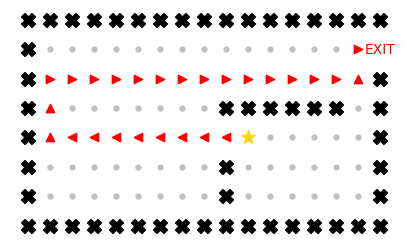

Starting point (x, y) = (4, 10)
Ending point (x, y) = (1, 16)
Cost: 27


In [5]:
run_search_nobonus(g1, DFS)

### BFS

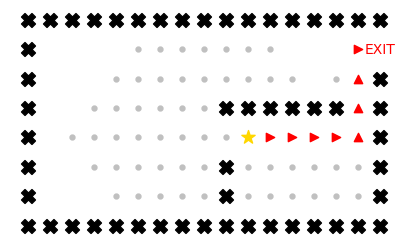

Starting point (x, y) = (4, 10)
Ending point (x, y) = (1, 16)
Cost: 9


In [6]:
run_search_nobonus(g1, BFS)

### Greedy Best-first Search

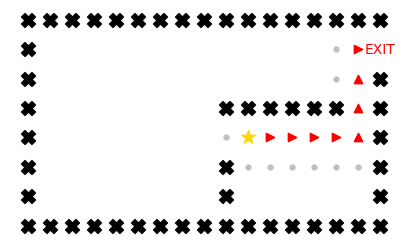

Starting point (x, y) = (4, 10)
Ending point (x, y) = (1, 16)
Cost: 9


In [7]:
run_search_nobonus(g1, GBFS, manhattan_heuristic)

### A*

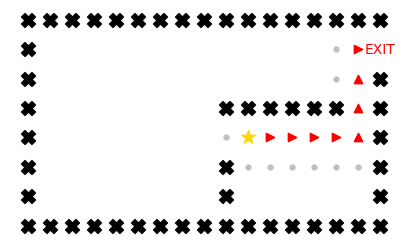

Starting point (x, y) = (4, 10)
Ending point (x, y) = (1, 16)
Cost: 9


In [8]:
# Đồ thị 1, A*
run_search_nobonus(g1, Astar, manhattan_heuristic)

**Chú thích:** màu đỏ đại diện cho đường đi mà thuật toán đã tìm được, còn các hình tròn màu xám đại diện cho các ô mà thuật toán đã từng ghé thăm.

GBFS, BFS và A* đã tìm được đường đi ngắn nhất từ `START` đến `EXIT`. Còn DFS thì do chỉ "chăm chăm" vào đi một lối nên nó đã phải duyệt hết tất cả các hướng của bản đồ mới tìm được lối ra (điều này còn tùy thuộc vào implementation của DFS. Nhóm em tạo danh sách kề theo thứ tự: trên, dưới, phải, trái, nên DFS sẽ duyệt theo thứ tự ngược lại (vì nó dùng stack làm fringe)).

Ngoài ra, ta cũng thấy được trong map này GBFS và A* duyệt ít ô nhất (các ô màu xám) so với 2 thuật toán còn lại.

| Thuật toán | Chi phí |
|------------|---------|
| DFS        | 27      |
| BFS        | 9       |
| GBFS (M)   | 9       |
| A* (M)     | 9       |

## Bản đồ 2 (7x17)

In [9]:
g2 = Graph('testcases/nobonus2.txt')

Graph initialized from maze with size 9 x 17


### DFS

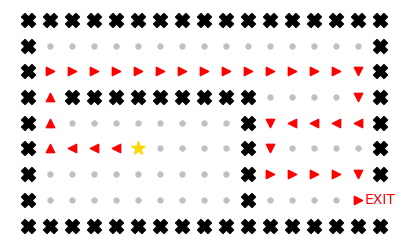

Starting point (x, y) = (5, 5)
Ending point (x, y) = (7, 16)
Cost: 35


In [10]:
run_search_nobonus(g2, DFS)

### BFS

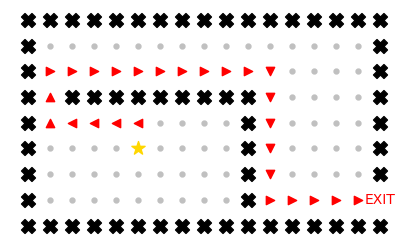

Starting point (x, y) = (5, 5)
Ending point (x, y) = (7, 16)
Cost: 27


In [11]:
run_search_nobonus(g2, BFS)

### Greedy Best-first Search

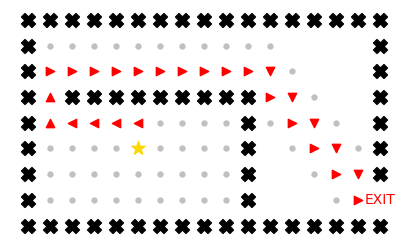

Starting point (x, y) = (5, 5)
Ending point (x, y) = (7, 16)
Cost: 27


In [12]:
run_search_nobonus(g2, GBFS, euclide_heuristic)

### A* (Manhattan)

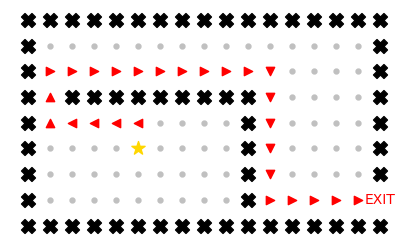

Starting point (x, y) = (5, 5)
Ending point (x, y) = (7, 16)
Cost: 27


In [13]:
run_search_nobonus(g2, Astar, manhattan_heuristic)

### A* (Euclide)

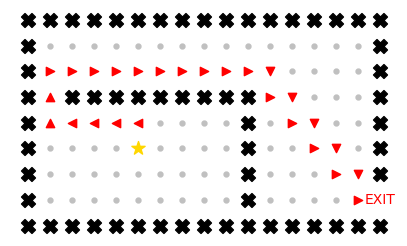

Starting point (x, y) = (5, 5)
Ending point (x, y) = (7, 16)
Cost: 27


In [14]:
run_search_nobonus(g2, Astar, euclide_heuristic)

Cũng tương tự như trên, BFS, GBFS và A* đã tìm được đường đi ngắn nhất từ `START` đến `EXIT`, còn DFS thì lại đi lòng vòng. Ở đây chúng em cũng cho thử A* với 2 hàm heuristic là hàm khoảng cách Manhattan và Euclide. Chi phí đường đi trong 2 trường hợp là như nhau, nhưng khi sử dụng heuristic là hàm Euclide thì thuật toán có xu hướng đi chéo (vì khoảng cách Euclide là khoảng cách "theo đường chéo" trên hệ trục tọa độ).  

Chiến lược của A* khác GBFS ở chỗ GBFS sẽ chạy thẳng tới điểm mà nó cho là gần đích nhất, trong khi đó A* sẽ mở thêm các node lân cận để "xem thử" có điểm nào gần đích hơn là đường đi mà nó vừa tìm được hay không.

| Thuật toán | Chi phí |
|------------|---------|
| DFS        | 35      |
| BFS        | 27      |
| GBFS (E)   | 27      |
| A* (M)     | 27      |
| A* (E)     | 27      |

## Bản đồ 3 (10x32)

In [15]:
g3 = Graph('testcases/nobonus3.txt')

Graph initialized from maze with size 10 x 32


### DFS

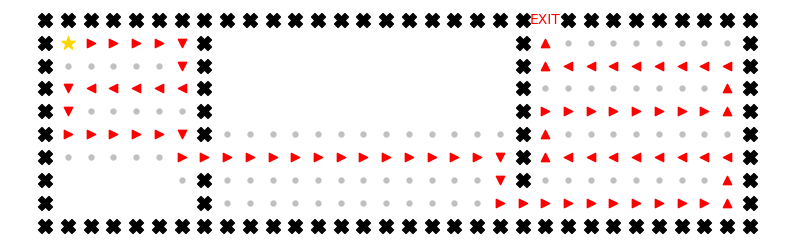

Starting point (x, y) = (1, 1)
Ending point (x, y) = (0, 22)
Cost: 78


In [16]:
run_search_nobonus(g3, DFS, figsize=(10, 3))

### BFS

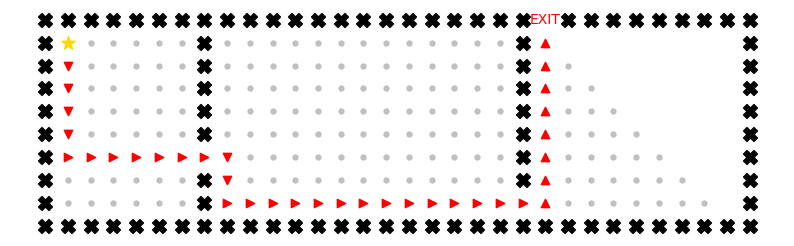

Starting point (x, y) = (1, 1)
Ending point (x, y) = (0, 22)
Cost: 36


In [17]:
run_search_nobonus(g3, BFS,figsize=(10, 3))

### Greedy Best-first Search (Manhattan)

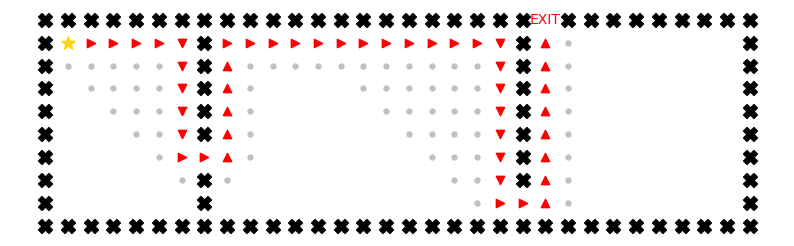

Starting point (x, y) = (1, 1)
Ending point (x, y) = (0, 22)
Cost: 46


In [18]:
run_search_nobonus(g3, GBFS,manhattan_heuristic,figsize=(10, 3))

### Greedy Best-first Search (Euclide)

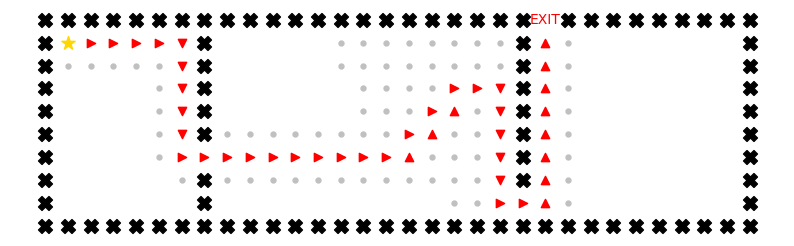

Starting point (x, y) = (1, 1)
Ending point (x, y) = (0, 22)
Cost: 42


In [19]:
run_search_nobonus(g3, GBFS, euclide_heuristic,figsize=(10, 3))

### A* (Manhattan)

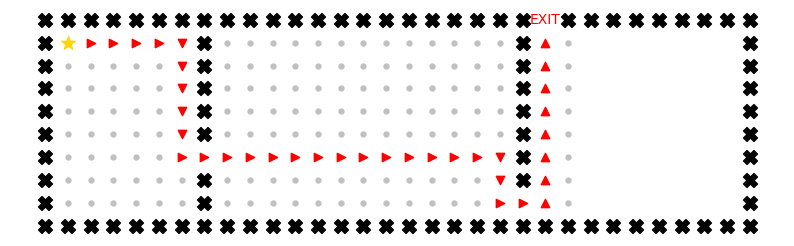

Starting point (x, y) = (1, 1)
Ending point (x, y) = (0, 22)
Cost: 36


In [20]:
run_search_nobonus(g3, Astar,manhattan_heuristic,figsize=(10, 3))

BFS và A* đã tìm được đường đi ngắn nhất từ `START` đến `EXIT`. DFS vẫn là thuật toán tốn nhiều chi phí nhất khi đi lòng vòng.

Ở đây chúng em thử GBFS với 2 hàm heuristic là hàm khoảng cách Manhattan và Euclide, chi phí đường đi của 2 trường hợp này là khác nhau và không có trường hợp nào tìm được đường đi ngắn nhất do điểm `EXIT` "được" một bờ tường che, khiến cách tìm điểm gần nhất với đích của GBFS không hiệu quả (*"tham lam là không tốt"*). Tuy nhiên với hàm khoảng cách Euclide thì GBFS "nhận ra" được bờ tường sớm hơn. 

Điều này là do khi sử dụng hàm heuristic là Manhattan, tại khúc cua sang căn phòng ở giữa GBFS có 2 lựa chọn: đi thẳng, hoặc đi lên trên. Khoảng cách Manhattan của 2 đường đi này là bằng nhau, cho nên nó có thể chọn 1 trong 2 (nhưng rõ ràng đi thẳng sẽ ngắn hơn nhiều). Ta thấy GBFS liệu có hoạt động hiệu quả hay không còn phụ thuộc vào implementation của đồ thị nữa (do nhóm em tạo danh sách kề theo thứ tự trên, dưới, phải, trái nên nó sẽ đi bên trên trước).

Ngoài ra, ta cũng thấy được trong bản đồ này A* duyệt ít ô hơn (các ô màu xám) so với thuật toán BFS.

| Thuật toán | Chi phí |
|------------|---------|
| DFS        |   78    |
| BFS        |   36    |
| GBFS (M)   |   46    |
| GBFS (E)   |   42    |
| A* (M)     |   36    |

## Bản đồ 4 (21x31)

In [21]:
g4 = Graph('testcases/nobonus4.txt')

Graph initialized from maze with size 21 x 31


### DFS

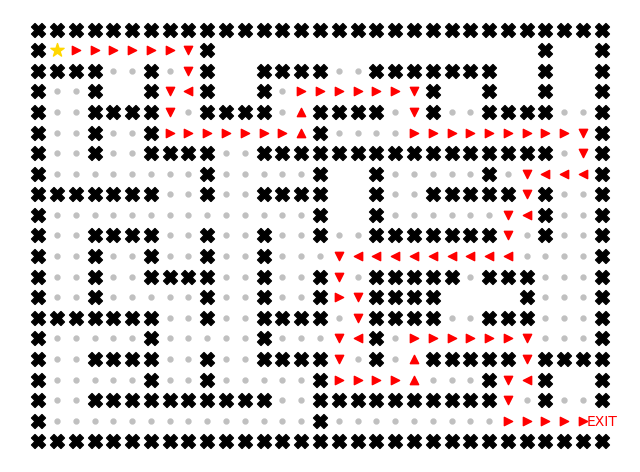

Starting point (x, y) = (1, 1)
Ending point (x, y) = (19, 30)
Cost: 87


In [22]:
run_search_nobonus(g4, DFS, figsize=(8, 6))

### BFS

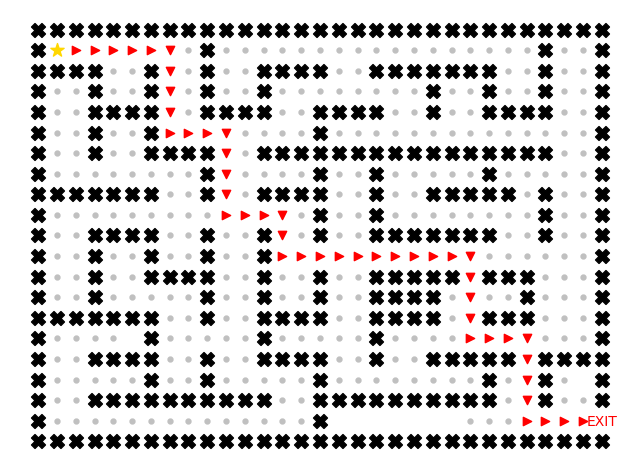

Starting point (x, y) = (1, 1)
Ending point (x, y) = (19, 30)
Cost: 47


In [23]:
run_search_nobonus(g4, BFS, figsize=(8, 6))

### Greedy Best-first Search (Manhattan)

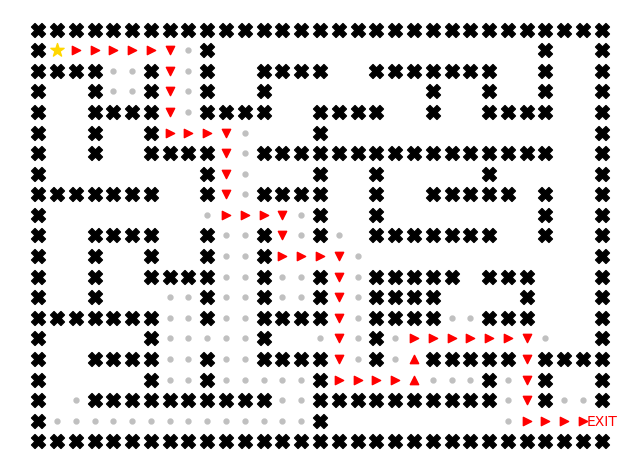

Starting point (x, y) = (1, 1)
Ending point (x, y) = (19, 30)
Cost: 51


In [24]:
run_search_nobonus(g4, GBFS,manhattan_heuristic,figsize=(8, 6))

### Greedy Best-first Search (Euclide)

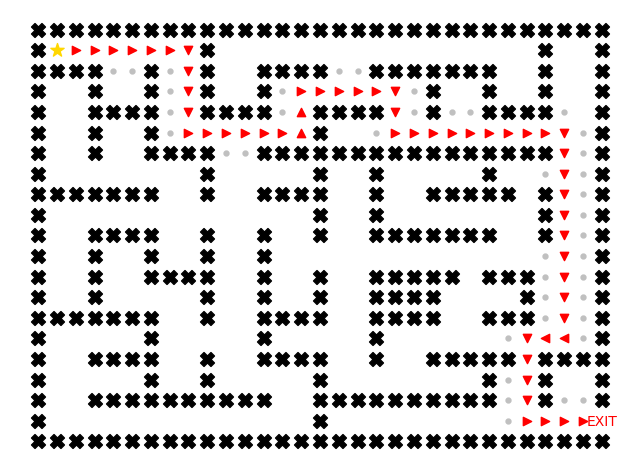

Starting point (x, y) = (1, 1)
Ending point (x, y) = (19, 30)
Cost: 55


In [25]:
run_search_nobonus(g4, GBFS, euclide_heuristic,figsize=(8,6))

### A* (Manhattan)

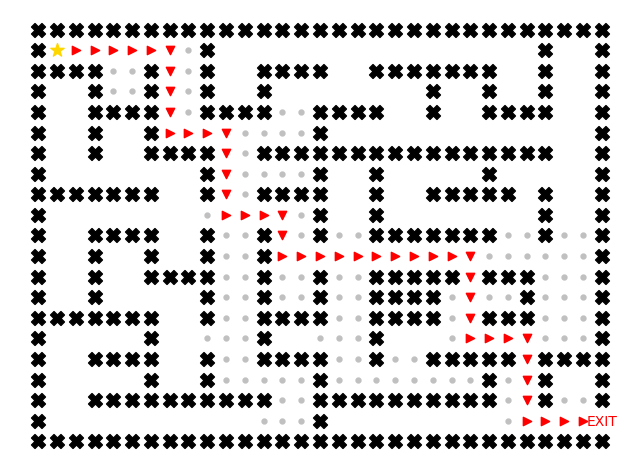

Starting point (x, y) = (1, 1)
Ending point (x, y) = (19, 30)
Cost: 47


In [26]:
run_search_nobonus(g4, Astar,manhattan_heuristic,figsize=(8, 6))

BFS và A* đã tìm được đường đi ngắn nhất từ `START` đến `EXIT`. DFS vẫn là thuật toán tốn nhiều chi phí nhất khi đi lòng vòng.

Ở đây chúng em thử GBFS với 2 hàm heuristic là hàm khoảng cách Manhattan và Euclide,chi phí đường đi của 2 trường hợp này là khác nhau và không có trường hợp nào tìm được đường đi ngắn nhất. Tuy nhiên khác với mê cung 3, trong mê cung này hàm khoảng cách Euclide tỏ ra kém hiệu quả hơn hàm khoảng cách Manhattan do đường đi ngắn nhất mê cung có ít sự ngăn cản từ các bức tường.

Ngoài ra, ta cũng thấy được trong bản đồ này A* duyệt ít ô hơn (các ô màu xám) so với thuật toán BFS.

| Thuật toán | Chi phí |
|------------|---------|
| DFS        |    87    |
| BFS        |    47    |
| GBFS (M)   |    51    |
| GBFS (E)   |    55    |
| A* (M)     |    47    |

## Bản đồ 5 (31x71)

In [27]:
g5 = Graph('testcases/nobonus5.txt')

Graph initialized from maze with size 31 x 71


### DFS

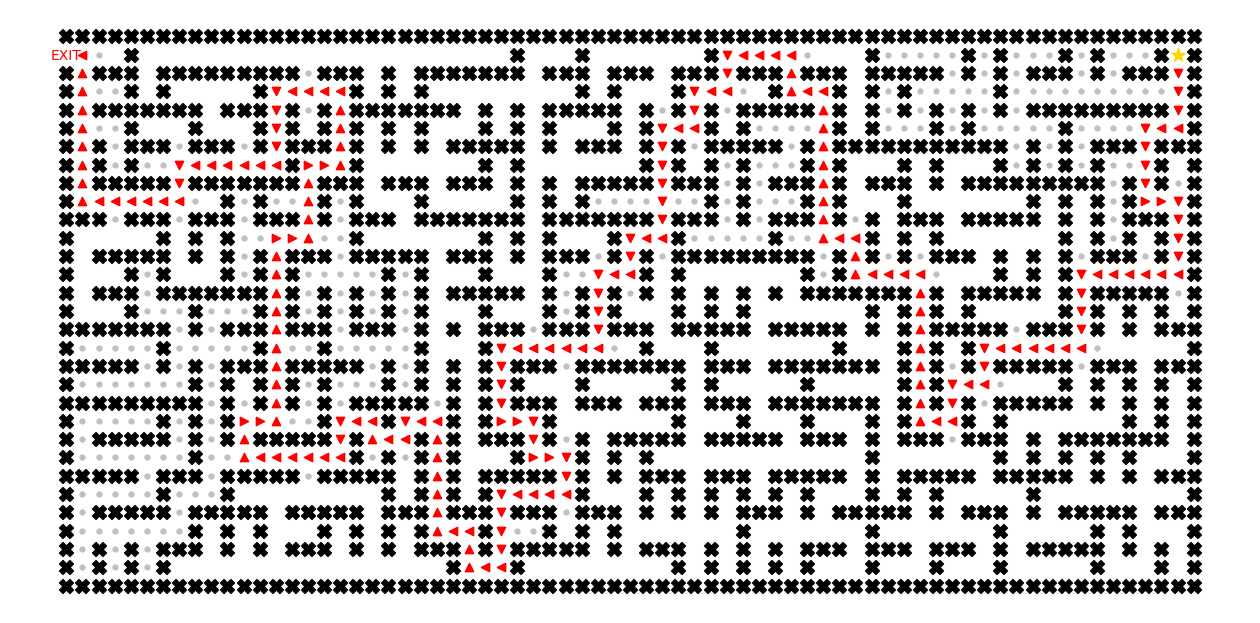

Starting point (x, y) = (1, 69)
Ending point (x, y) = (1, 0)
Cost: 207


In [28]:
run_search_nobonus(g5, DFS, figsize=(16, 8))

### BFS

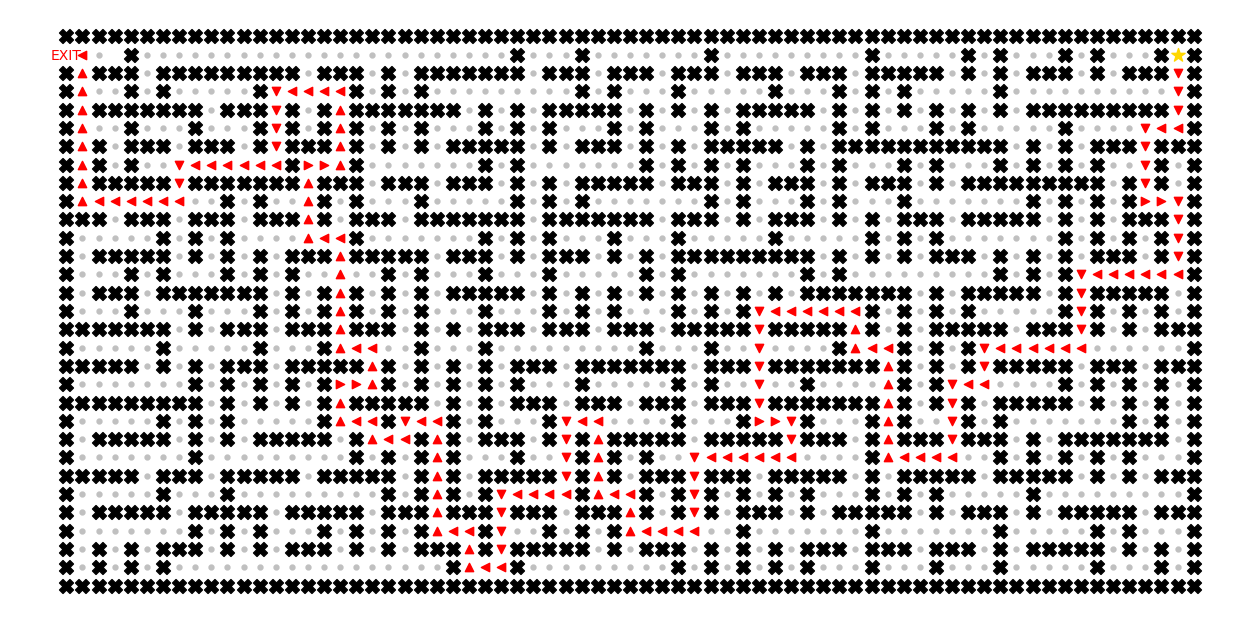

Starting point (x, y) = (1, 69)
Ending point (x, y) = (1, 0)
Cost: 183


In [29]:
run_search_nobonus(g5, BFS, figsize=(16, 8))

### Greedy Best-first Search (Euclide)

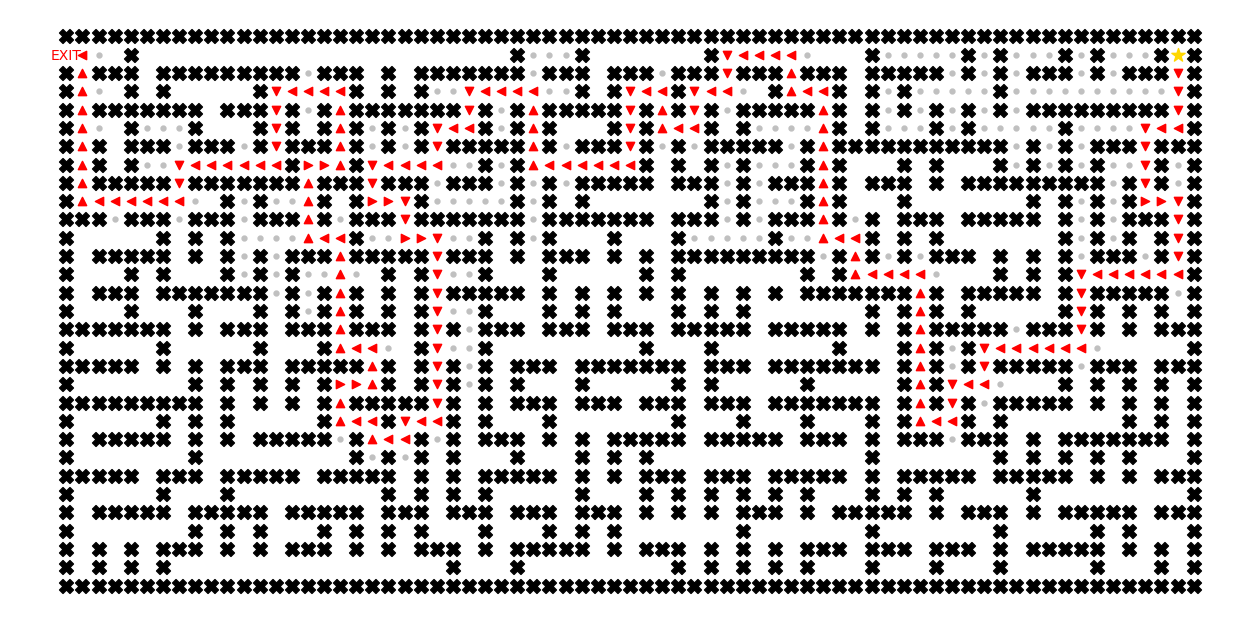

Starting point (x, y) = (1, 69)
Ending point (x, y) = (1, 0)
Cost: 195


In [30]:
run_search_nobonus(g5, GBFS, euclide_heuristic,figsize=(16,8))

### Greedy Best-first Search (Manhattan)

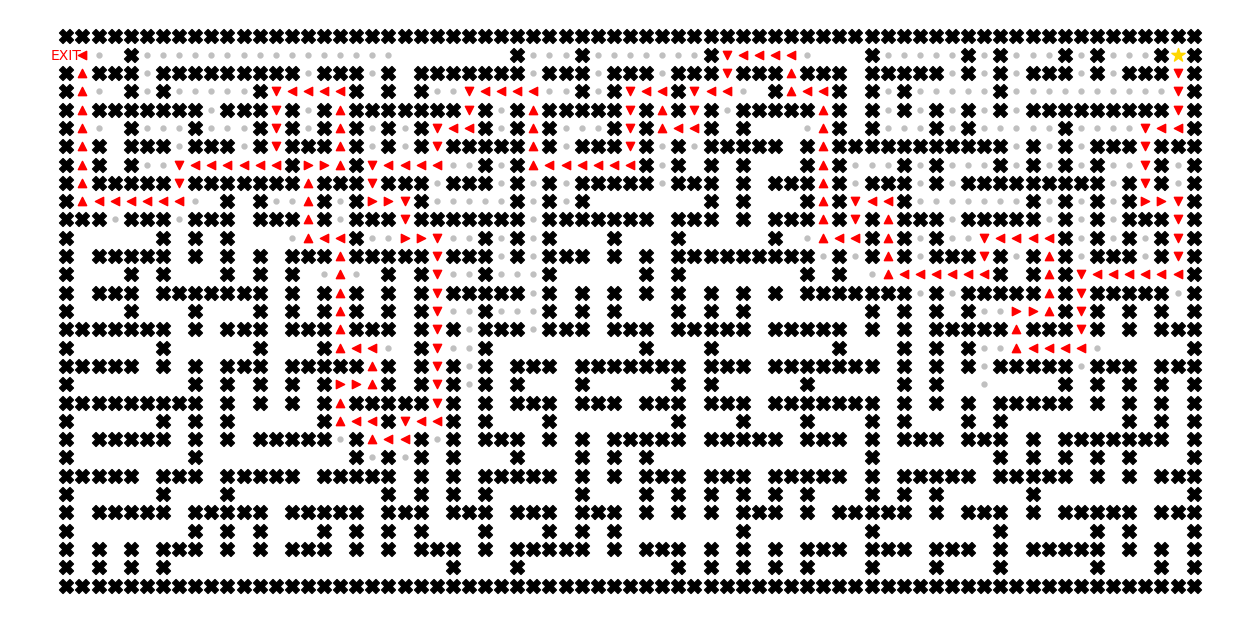

Starting point (x, y) = (1, 69)
Ending point (x, y) = (1, 0)
Cost: 199


In [31]:
run_search_nobonus(g5, GBFS,manhattan_heuristic,figsize=(16, 8))

### A* (Euclide)

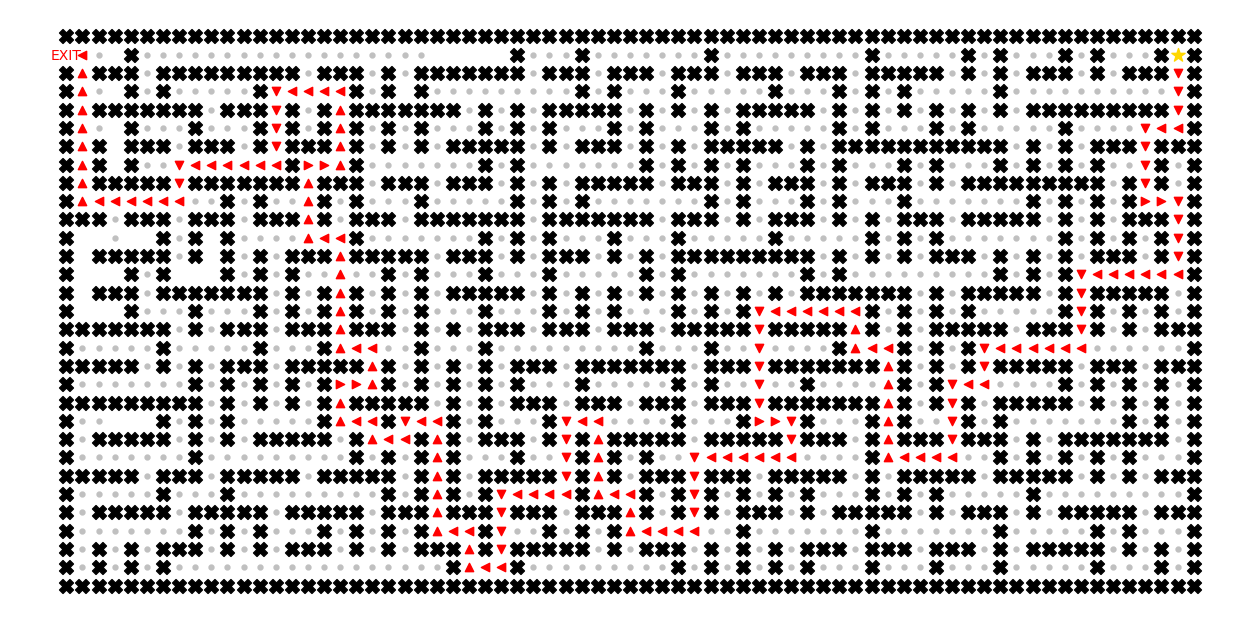

Starting point (x, y) = (1, 69)
Ending point (x, y) = (1, 0)
Cost: 183


In [32]:
run_search_nobonus(g5, Astar, euclide_heuristic,figsize=(16,8))

Đây là một bản đồ khá lớp và phức tạp. BFS và A* đã tìm được đường đi ngắn nhất từ `START` đến `EXIT`. DFS vẫn là thuật toán tốn nhiều chi phí nhất khi đi lòng vòng.

Ở đây chúng em thử GBFS với 2 hàm heuristic là hàm khoảng cách Manhattan và Euclide, chi phí đường đi của 2 trường hợp này là khác nhau và không có trường hợp nào tìm được đường đi ngắn nhất. Tuy nhiên khác với mê cung 4, trong mê cung này hàm khoảng cách Euclid tỏ ra hiệu quả hơn hàm khoảng cách Manhattan do đường đi ngắn nhất mê cung có nhiều sự ngăn cản từ các bức tường.

Trong mê cung này tụi em đã cố tình "đục" thêm nhiều lỗ trên các bức tường để tạo ra hơn một đường đi đến đích. Kết quả là GBFS đã chọn con đường đầu tiên và gần đích nhất mà nó tìm thấy, không kiểm tra các con đường khác. A* thì kiểm tra gần như tất cả các con đường mà nó đi được để tìm ra đường đi ngắn nhất (điều này phụ thuộc vào đặc điểm của từng bản đồ). Điều này xảy ra là do GBFS không phải là một thuật toán tối ưu, trong khi A* là một thuật toán tối ưu. 

Chiến lược của A* cũng thể hiện rõ khi gần tới đích, nó chỉ tìm cách để đi về đích nhanh nhất mà bỏ qua các ô "không cần thiết" ở các hướng khác, khác với chiến lược của BFS.

| Thuật toán | Chi phí |
|------------|---------|
| DFS        |   207     |
| BFS        |   183     |
| GBFS (E)   |   195     |
| GBFS (M)   |   199     |
| A* (M)     |   183     |